In [17]:
import pandas as pd

df = pd.read_csv("/content/Air_Quality_Database.csv")

df.info()
df.isnull().sum()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3244 non-null   object 
 1   state          3244 non-null   object 
 2   city           3244 non-null   object 
 3   station        3244 non-null   object 
 4   last_update    3244 non-null   object 
 5   latitude       3244 non-null   float64
 6   longitude      3244 non-null   float64
 7   pollutant_id   3244 non-null   object 
 8   pollutant_min  3092 non-null   float64
 9   pollutant_max  3092 non-null   float64
 10  pollutant_avg  3092 non-null   float64
dtypes: float64(5), object(6)
memory usage: 278.9+ KB


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Guwahati,"Railway Colony, Guwahati - PCBA",15-02-2026 11:00:00,26.181742,91.780630,NO2,3.0,3.0,3.0
1,India,Assam,Nalbari,"Bata Chowk, Nalbari - PCBA",15-02-2026 11:00:00,26.446912,91.439057,PM10,89.0,127.0,106.0
2,India,Assam,Silchar,"Tarapur, Silchar - PCBA",15-02-2026 11:00:00,24.828270,92.795250,PM2.5,32.0,89.0,60.0
3,India,Assam,Silchar,"Tarapur, Silchar - PCBA",15-02-2026 11:00:00,24.828270,92.795250,SO2,3.0,6.0,5.0
4,India,Assam,Sivasagar,"Girls College, Sivasagar - PCBA",15-02-2026 11:00:00,26.987634,94.636574,NH3,6.0,18.0,9.0


In [18]:
# remove rows where target value is missing
df = df.dropna(subset=['pollutant_avg'])

# check again
df.isnull().sum()


,0
country,0
state,0
city,0
station,0
last_update,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,0
pollutant_max,0


In [19]:
df['last_update'] = pd.to_datetime(df['last_update'])


/tmp/ipython-input-3496412634.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_update'] = pd.to_datetime(df['last_update'])


In [20]:
df['year'] = df['last_update'].dt.year
df['month'] = df['last_update'].dt.month
df['day'] = df['last_update'].dt.day
df['hour'] = df['last_update'].dt.hour


In [21]:
df = df.drop('last_update', axis=1)


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['country'] = le.fit_transform(df['country'])
df['state'] = le.fit_transform(df['state'])
df['city'] = le.fit_transform(df['city'])
df['station'] = le.fit_transform(df['station'])
df['pollutant_id'] = le.fit_transform(df['pollutant_id'])


In [23]:
# Separate features and target

X = df.drop('pollutant_avg', axis=1)   # input data
y = df['pollutant_avg']                # output we predict

print(X.shape)
print(y.shape)


(3092, 13)
(3092,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)


(2473, 13)
(619, 13)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [26]:
predictions = model.predict(X_test)

print(predictions[:5])


[ 17.40803367  29.4881923   26.82900514  37.06112156 205.15786518]


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 174.09171434413722
R2 Score: 0.9347549477448122


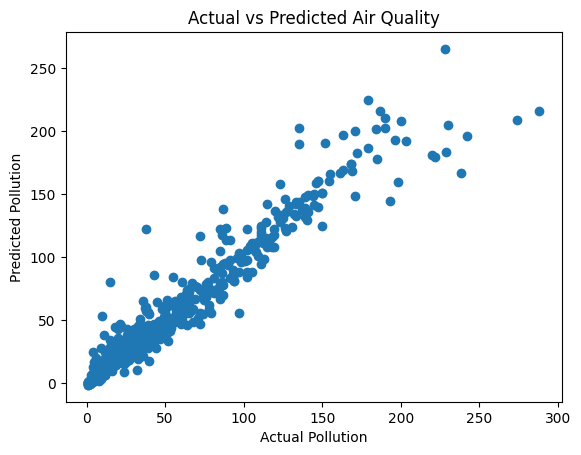

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Pollution")
plt.ylabel("Predicted Pollution")
plt.title("Actual vs Predicted Air Quality")
plt.show()


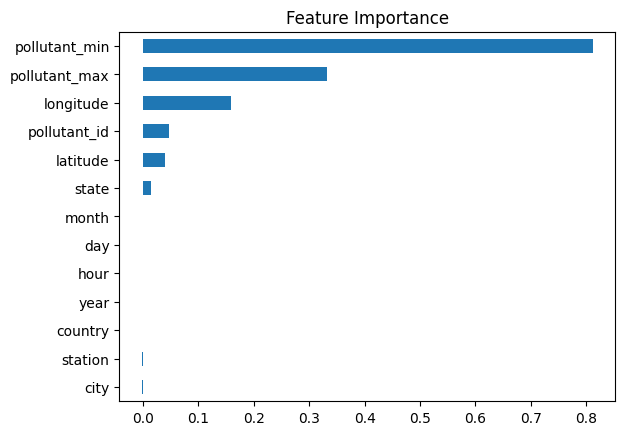

In [29]:
import pandas as pd

importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("RF MSE:", mean_squared_error(y_test, rf_pred))
print("RF R2:", r2_score(y_test, rf_pred))


RF MSE: 124.51689693053311
RF R2: 0.953334301534724


In [31]:
import joblib
joblib.dump(rf, "air_quality_model.pkl")


['air_quality_model.pkl']

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import shutil

shutil.copy("/content/air_quality_model.pkl",
            "/content/drive/MyDrive/air_quality_model.pkl")


'/content/drive/MyDrive/air_quality_model.pkl'